# Generate data that has no correlation

In [21]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Number of subjects (rows)
num_subjects = 50

# Generate random age data (between 20 and 70 years)
age = np.random.randint(20, 71, num_subjects)

# Generate glucose levels based on age and with zero correlation between age (x) and glucose level (y)
glucose_level = np.random.randint(70, 200, num_subjects)

In [3]:
# Create a DataFrame
data_noCorr = pd.DataFrame({
    'Subject #': np.arange(1, num_subjects + 1),
    'Age (x)': age,
    'Glucose Level (y)': glucose_level
})

# Display the DataFrame
print(data_noCorr.head())

   Subject #  Age (x)  Glucose Level (y)
0          1       58                 78
1          2       48                159
2          3       34                122
3          4       62                199
4          5       27                153


In [4]:
# Display the first 10 rows of the dataset
print("Subject # | Age (x) | Glucose Level (y)")
for i in range(10):
    print(f"{i+1:9} | {age[i]:7} | {glucose_level[i]:15.2f}")

Subject # | Age (x) | Glucose Level (y)
        1 |      58 |           78.00
        2 |      48 |          159.00
        3 |      34 |          122.00
        4 |      62 |          199.00
        5 |      27 |          153.00
        6 |      40 |          161.00
        7 |      58 |          180.00
        8 |      38 |           77.00
        9 |      42 |          104.00
       10 |      30 |          150.00


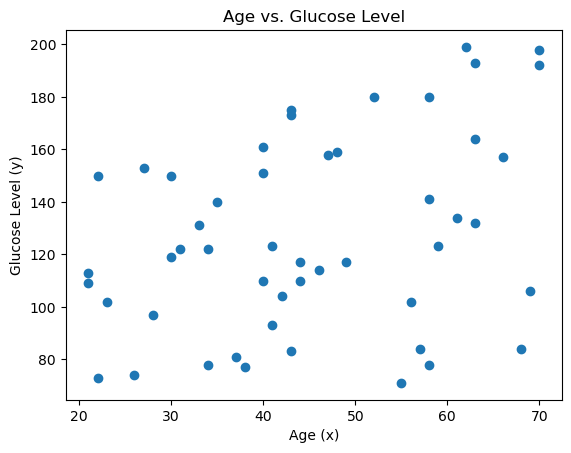

In [5]:
# Plot the data
plt.scatter(age, glucose_level)
plt.xlabel("Age (x)")
plt.ylabel("Glucose Level (y)")
plt.title("Age vs. Glucose Level")
plt.show()

### Clearly, there is no correlation between Age (x) and Glucose Level (y)

---
---

# Generate a dataset that has perfect positive correlation of +1

In [6]:
# Generate age data (between 20 and 70 years)
age = np.random.randint(20, 71, num_subjects)

# Generate glucose levels directly proportional to age (with some added noise)
# This will result in a perfect positive correlation of +1
glucose_level = age + np.random.normal(0, 5, num_subjects)

# Create a DataFrame
data = pd.DataFrame({
    'Subject #': np.arange(1, num_subjects + 1),
    'Age (x)': age,
    'Glucose Level (y)': glucose_level
})

# Display the first few rows of the DataFrame
print(data.head())

   Subject #  Age (x)  Glucose Level (y)
0          1       54          51.351199
1          2       63          65.566337
2          3       59          59.485388
3          4       41          45.843225
4          5       46          42.489735


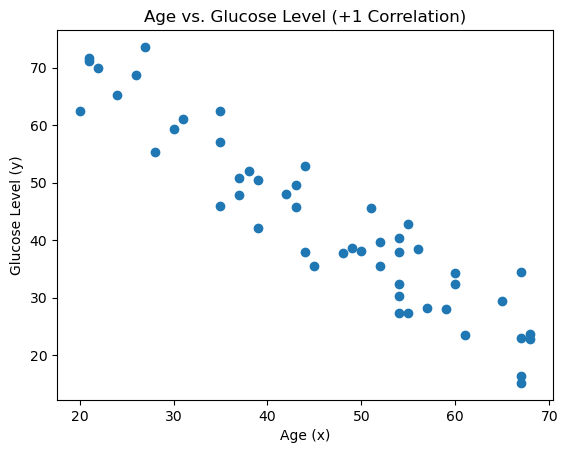

In [16]:
# Plot the data
plt.scatter(age, glucose_level)
plt.xlabel("Age (x)")
plt.ylabel("Glucose Level (y)")
plt.title("Age vs. Glucose Level (+1 Correlation)")
plt.show()

**Clearly, we can see as *`Age (x)`* goes up, the *`Glucose Level (y)`* goes up as well, almost with the same magnitude**

---
---

# Generate a dataset that has perfect negative correlation of -1

In [8]:
# Generate age data (between 20 and 70 years)
age = np.random.randint(20, 71, num_subjects)

# Generate glucose levels inversely proportional to age (with some added noise)
# This will result in a perfect negative correlation of -1
glucose_level = 90 - age + np.random.normal(0, 5, num_subjects)

# Create a DataFrame
data = pd.DataFrame({
    'Subject #': np.arange(1, num_subjects + 1),
    'Age (x)': age,
    'Glucose Level (y)': glucose_level
})

# Display the first few rows of the DataFrame
print(data.head())

   Subject #  Age (x)  Glucose Level (y)
0          1       42          47.975715
1          2       50          38.083383
2          3       49          38.687366
3          4       61          23.437513
4          5       54          40.336147


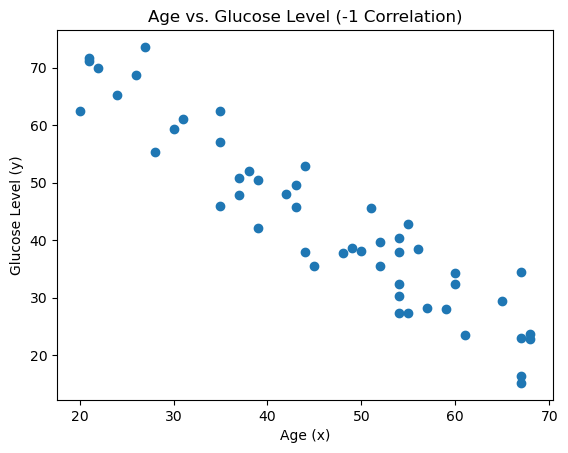

In [9]:
# Plot the data
plt.scatter(age, glucose_level)
plt.xlabel("Age (x)")
plt.ylabel("Glucose Level (y)")
plt.title("Age vs. Glucose Level (-1 Correlation)")
plt.show()

---
---

# Pearson's Correlation

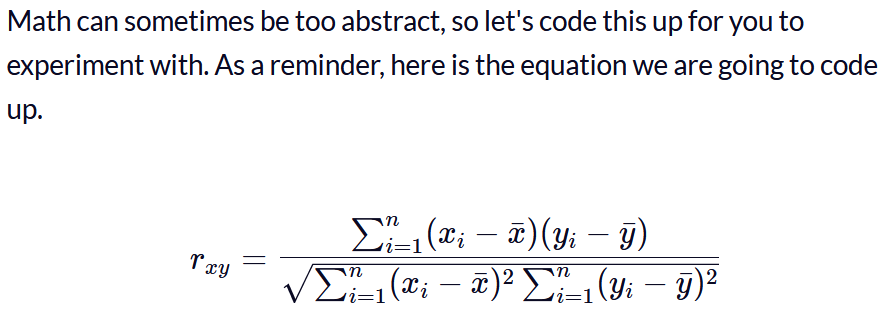

In [10]:
# Below is the Python version of the Pearson correlation.

def pearson(x, y):
    """
    Calculate Pearson correlation coefficient of arrays x and y.
    """
    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # Calculate numerator and denominator
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator = np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))
    
    # Avoid division by zero
    if denominator == 0:
        return 0
    
    # Calculate Pearson correlation coefficient
    correlation_coefficient = numerator / denominator
    return correlation_coefficient

# Assuming data is a DataFrame with 'Age (x)' and 'Glucose Level (y)'
# Replace with your actual DataFrame name
data = pd.DataFrame({
    'Age (x)': np.random.randint(20, 71, 50),
    'Glucose Level (y)': np.random.randint(70, 200, 50)
})


# Calculate Pearson correlation coefficient
correlation = pearson(data['Age (x)'], data['Glucose Level (y)'])
print("Pearson correlation coefficient (r):", round(correlation,2))


Pearson correlation coefficient (r): 0.15


In [14]:
# Create fake data
x = np.arange(5, 15)  # array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
y = np.array([24, 0, 58, 26, 82, 89, 90, 90, 36, 56])

# Use a package to calculate Pearson's r
# Note: the p variable below is the p-value for the Pearson's r. This tests
#   how far away our correlation is from zero and has a trend.
r, p = scipy.stats.pearsonr(x, y)
round(r,2)

0.51

In [13]:
# Use our own function
round(pearson(x, y),2)

0.51

---

## Correlation Examples

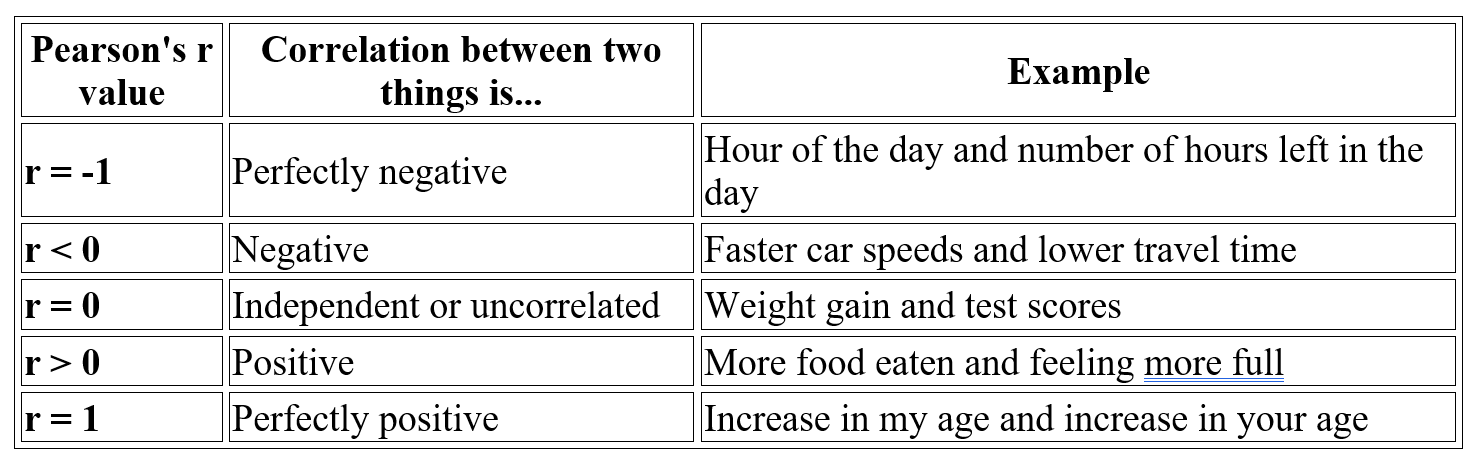

In [17]:
world_happiness = pd.read_csv("Datasets/world_happiness.csv")

In [18]:
world_happiness.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


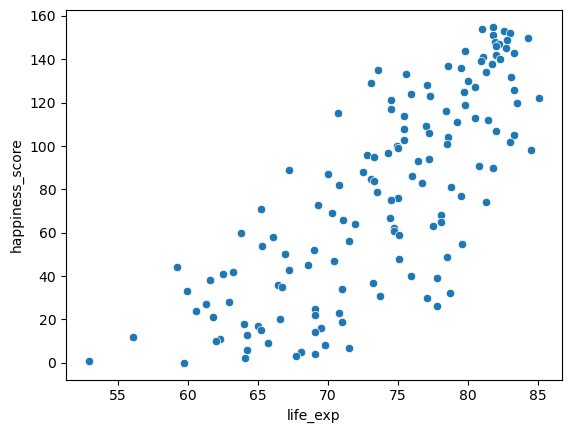

In [19]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x="life_exp", y="happiness_score", data=world_happiness)

# Show plot
plt.show()

### Add a trendline to correlation plot

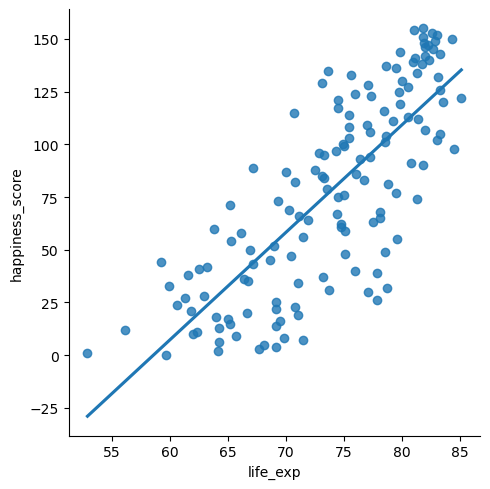

In [22]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(x="life_exp", y="happiness_score", data=world_happiness, ci=None)

# Show plot
plt.show()

In [24]:
# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(round(cor, 2))

0.78
